<p style='font-family: times, serif; font-size:25pt; font-style:bold; color:white;'>
    SHyTCWaves - Application for bulk parameters
</p>

<p style='font-family: times, serif; font-size:16pt; font-style:bold; color:white;'>
    TC - historical tracks
</p>

<hr size="5"/>

<div class="alert-warning">
<b>Info:</b> Here SHyTCWaves runs for the defined track and in the area defined below
</div>

<style>
.alert-warning {
    background-color: #ffcccb; /* Color de fondo rojito claro */
    color: #8b0000; /* Color del texto rojo oscuro */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #f08080; /* Borde rojo claro */
}
</style>

In [1]:
import warnings

warnings.filterwarnings("ignore")

# common
import os
import os.path as op
import time

# pip
import numpy as np
import xarray as xr

# shytcwaves
from bluemath_tk.tcs.tracks import check_and_plot_track_data, resample_storm_6h
from bluemath_tk.tcs.shytcwaves import historic2shytcwaves_cluster
from utils.plotting import plot_storm_track, plot_swath_shytcwaves, plot_hs_tp_point

###  **1. Load data**

<div class="alert-warning">
<b>Info:</b> Here SHyTCWaves runs for the defined track and in the area defined below
</div>

<style>
.alert-warning {
    background-color: #fffacd; /* Color de fondo amarillito más oscuro */
    color: #8b8000; /* Color del texto amarillo oscuro */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #f0e68c; /* Borde amarillo oscuro */
}
</style>

In [2]:
# IBTrACS
p_tracks = "/lustre/geocean/DATA/GEOOCEAN/IBTrACS.ALL.v04r00.nc"  # If this changes, it also needs to be modified in storms.py
xds_tcs = xr.open_dataset(p_tracks)

# SHyTCWaves
path_library = "/lustre/geocean/DATA/GEOOCEAN/SHyTCWaves_bulk/"  # Path to folder in which "library_shytcwaves_bulk_params.nc" is
path_mda = (
    "/home/grupos/geocean/tausiaj/BlueMath_tk/shytcAlba/data_shytcwaves/library_mda"
)

In [3]:
output_folder_name = "outputs"
output_path = op.join(os.getcwd(), output_folder_name)
os.makedirs(output_path, exist_ok=True)

###  **2. Storm selection**

<div class="alert-warning">
<b>Info:</b> Here SHyTCWaves runs for the defined track and in the area defined below
</div>

<style>
.alert-warning {
    background-color: #d3d3e6; /* Color de fondo azul más seco y clarito */
    color: #00008b; /* Color del texto azul oscuro */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #b0c4de; /* Borde azul acero claro */
}
</style>

The track can be selected by:
- Position 
- Name and year

In [4]:
# to select tc from id
# itc = 10000

In [5]:
# to select tc from name and year
name_tc, year_tc = "KATRINA", 2005
itc = np.where(
    (xds_tcs["name"].values.astype("str") == name_tc)
    & (xds_tcs.isel(date_time=0).time.dt.year.values == year_tc)
)[0]
storm = xds_tcs.isel(storm=itc).squeeze()
storm

<xarray.Dataset> Size: 264kB
Dimensions:           (date_time: 360, quadrant: 4)
Coordinates:
    time              (date_time) datetime64[ns] 3kB ...
    lat               (date_time) float32 1kB ...
    lon               (date_time) float32 1kB ...
Dimensions without coordinates: date_time, quadrant
Data variables: (12/147)
    numobs            float32 4B ...
    sid               |S13 13B ...
    season            float32 4B ...
    number            int16 2B ...
    basin             (date_time) |S2 720B ...
    subbasin          (date_time) |S2 720B ...
    ...                ...
    reunion_gust      (date_time) float32 1kB ...
    reunion_gust_per  (date_time) float32 1kB ...
    usa_seahgt        (date_time) float32 1kB ...
    usa_searad        (date_time, quadrant) float32 6kB ...
    storm_speed       (date_time) float32 1kB ...
    storm_dir         (date_time) float32 1kB ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

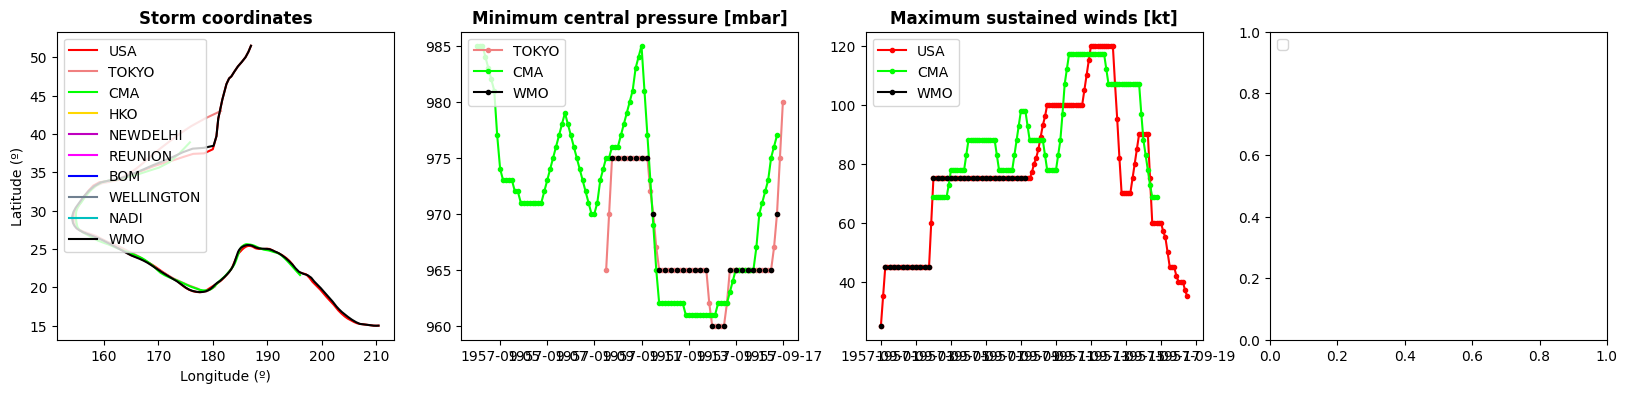

In [6]:
storm = xr.open_dataset("outputs/ibtracs_oahu.nc").isel(storm=1)
storm_year = int(storm.season.values)

name = str(storm.name.values)[2:-1]
year = storm.time[0].dt.year.values

# plot IBTrACS data
fig = check_and_plot_track_data(storm)

In [7]:
# convert bytes to str
storm

<xarray.Dataset> Size: 264kB
Dimensions:           (date_time: 360, quadrant: 4)
Coordinates:
    time              (date_time) datetime64[ns] 3kB 1957-09-01T00:00:00.0000...
    lat               (date_time) float32 1kB 15.0 14.99 15.0 ... nan nan nan
    lon               (date_time) float32 1kB 210.4 210.0 209.5 ... nan nan nan
Dimensions without coordinates: date_time, quadrant
Data variables: (12/147)
    numobs            float32 4B ...
    sid               |S13 13B ...
    season            float32 4B 1.957e+03
    number            int16 2B ...
    basin             (date_time) |S2 720B ...
    subbasin          (date_time) |S2 720B ...
    ...                ...
    reunion_gust      (date_time) float32 1kB ...
    reunion_gust_per  (date_time) float32 1kB ...
    usa_seahgt        (date_time) float32 1kB ...
    usa_searad        (date_time, quadrant) float32 6kB ...
    storm_speed       (date_time) float32 1kB ...
    storm_dir         (date_time) float32 1kB ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [8]:
# NOTE
# resample to 6H
# it may be necessary only for some tracks

storm = resample_storm_6h(storm)
storm["lon"] = (
    ("time"),
    np.where(storm["lon"].values < 0, storm["lon"].values + 360, storm["lon"].values),
)

###  **3. SHyTCWaves**

<div class="alert-warning">
<b>Info:</b> Here SHyTCWaves runs for the defined track and in the area defined below
</div>

<style>
.alert-warning {
    background-color: #f0fff0; /* Color de fondo verdecito muy claro */
    color: #006400; /* Color del texto verde oscuro */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #98fb98; /* Borde verde claro */
}
</style>

In [9]:
# Are sourrounding storm to extract bulk parameters
extra_area = 12
area = [
    storm.lon.min().values - extra_area,
    storm.lon.max().values + extra_area,
    storm.lat.min().values - extra_area,
    storm.lat.max().values + extra_area,
]

In [10]:
from bluemath_tk.config.paths import PATHS
xr.open_dataset(PATHS["SHYTCWAVES_COEFS"])

<xarray.Dataset> Size: 224MB
Dimensions:  (center: 10, basin: 7, data: 200000, polynomial: 4)
Coordinates:
  * center   (center) |S64 640B b'USA' b'TOKYO' b'CMA' ... b'NADI' b'WMO'
  * basin    (basin) |S64 448B b'NA' b'SA' b'WP' b'EP' b'SP' b'NI' b'SI'
Dimensions without coordinates: data, polynomial
Data variables:
    pres     (center, basin, data) float64 112MB ...
    coef     (center, basin, polynomial) float64 2kB ...
    wind     (center, basin, data) float64 112MB ...

In [11]:
t0 = time.time()

# project path
path_proj = op.join(output_path, "tc_{0}_{1}_{2}".format(itc, name, year))
if not op.isdir(path_proj):
    os.mkdir(path_proj)

tc_name = name + "_hist"
center = "WMO"

swath_resolution = 0.5
lon = np.arange(area[0], area[1], swath_resolution)
lat = np.arange(area[2], area[3], swath_resolution)

historic2shytcwaves_cluster(
    path_proj,
    path_mda,
    path_library,
    tc_name,
    storm,
    center,
    lon,
    lat,
    calibration=True,
    extract_bulk=True,
)

print(f"Elapsed time: {time.time() - t0} s")

27
st: 27 df_seg: 26
Number of segments: 24, number of swath nodes: 8256
Merging bulk envelope... 2025-05-23 12:16:11.254820
Files stored.

Elapsed time: 500.1618502140045 s


###  **4. Plotting**

<div class="alert-warning">
<b>Info:</b> Plotting results - Maps and timeseries
</div>

<style>
.alert-warning {
    background-color: #e6e6fa; 
    color: #4b0082; /* text */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #dda0dd; 
}
</style>

In [12]:
# Load results
xds_bulk = xr.open_dataset(op.join(path_proj, "{0}_xds_shy_bulk.nc".format(tc_name)))
xds_bulk

<xarray.Dataset> Size: 630MB
Dimensions:    (case: 24, time: 186, point: 8256)
Coordinates:
  * case       (case) int64 192B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
  * time       (time) datetime64[ns] 1kB 1957-09-10T06:00:00 ... 1957-09-17T2...
Dimensions without coordinates: point
Data variables:
    hs         (case, point, time) float64 295MB ...
    tp         (case, point, time) float64 295MB ...
    lon        (point) float64 66kB ...
    lat        (point) float64 66kB ...
    ix_near    (case, point) float64 2MB ...
    pos_nonan  (case, point) float64 2MB ...
    bmu        (point, time) float64 12MB ...
    hsbmu      (point, time) float64 12MB ...
    tpbmu      (point, time) float64 12MB ...
    hswath     (point) float64 66kB ...
    tswath     (point) float64 66kB ...

<div class="alert-warning">
<b>Info:</b> Plot Storm Track
</div>

<style>
.alert-warning {
    background-color: #ffe4e1; /* Color de fondo rosita claro */
    color: #c71585; /* Color del texto rosa fuerte */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #ffb6c1; /* Borde rosa claro */
}
</style>

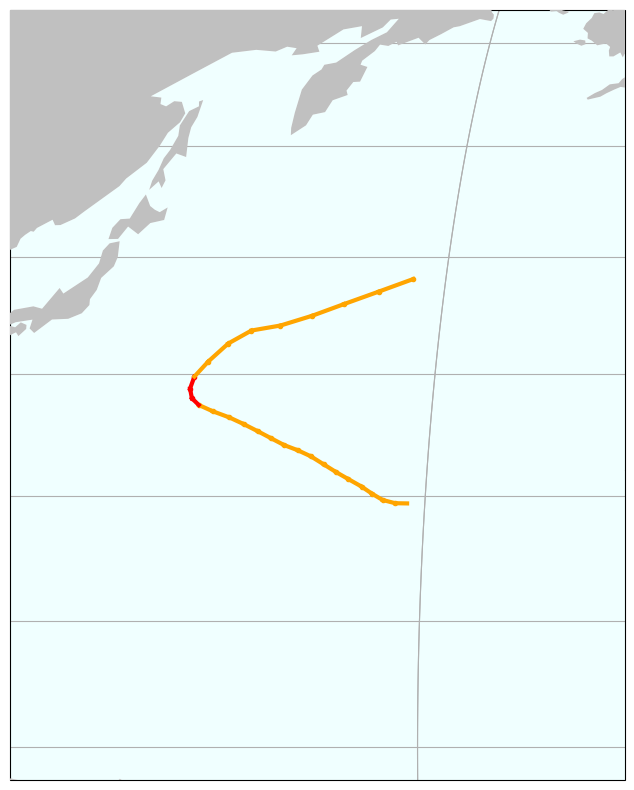

In [13]:
plot_storm_track(storm, area, itc, path_proj)

<div class="alert-warning">
<b>Info:</b> Plot Swath for Hs and Tp
</div>

<style>
.alert-warning {
    background-color: #ffe4e1; /* Color de fondo rosita claro */
    color: #c71585; /* Color del texto rosa fuerte */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #ffb6c1; /* Borde rosa claro */
}
</style>

Hs

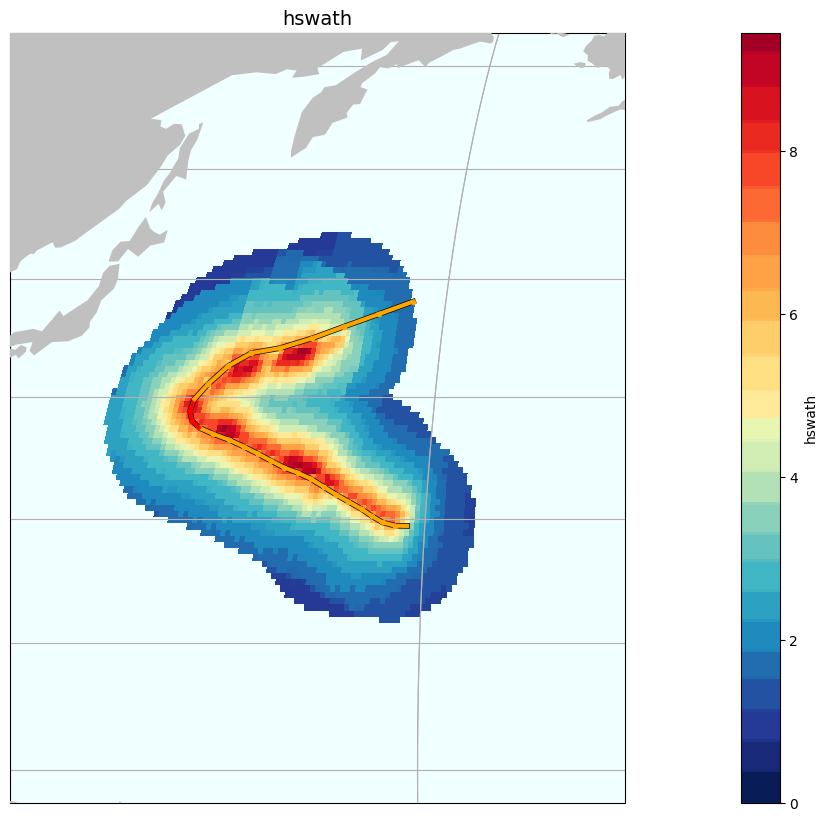

In [14]:
plot_swath_shytcwaves(storm, xds_bulk, area, itc, path_proj, var="hswath", vmax=None)

Tp

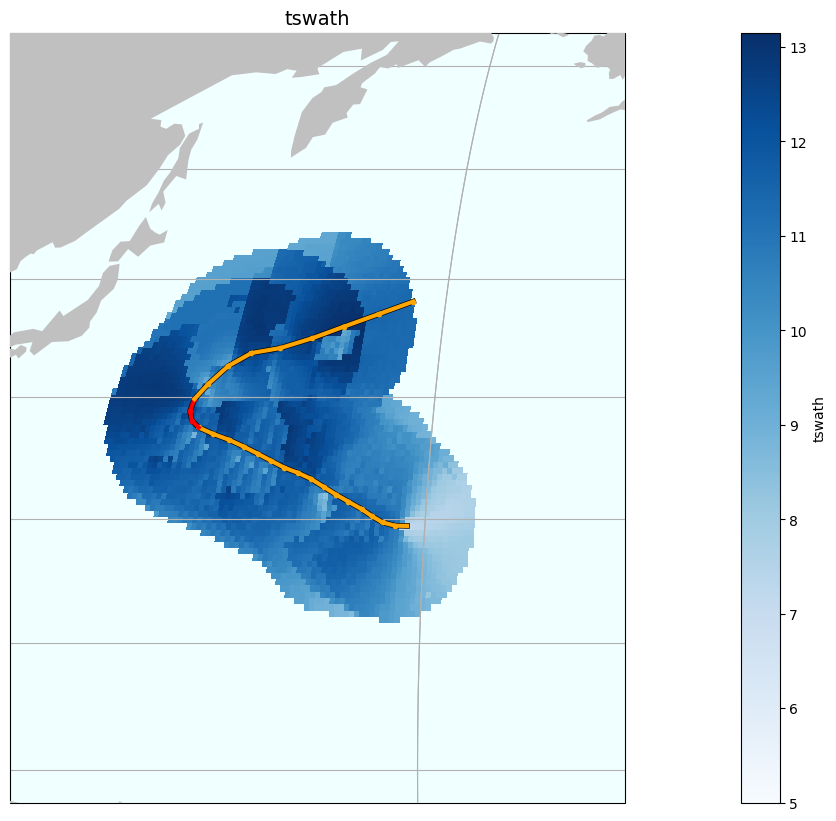

In [14]:
plot_swath_shytcwaves(
    storm, xds_bulk, area, itc, path_proj, var="tswath", vmin=5, vmax=None, cmap="Blues"
)

<div class="alert-warning">
<b>Info:</b> Plot Time evolution of Hs and Tp in a selected point
</div>

<style>
.alert-warning {
    background-color: #ffe4e1; /* Color de fondo rosita claro */
    color: #c71585; /* Color del texto rosa fuerte */
    padding: 10px;
    border-radius: 5px;
    border: 1px solid #ffb6c1; /* Borde rosa claro */
}
</style>

In [15]:
lon, lat = 150, 31

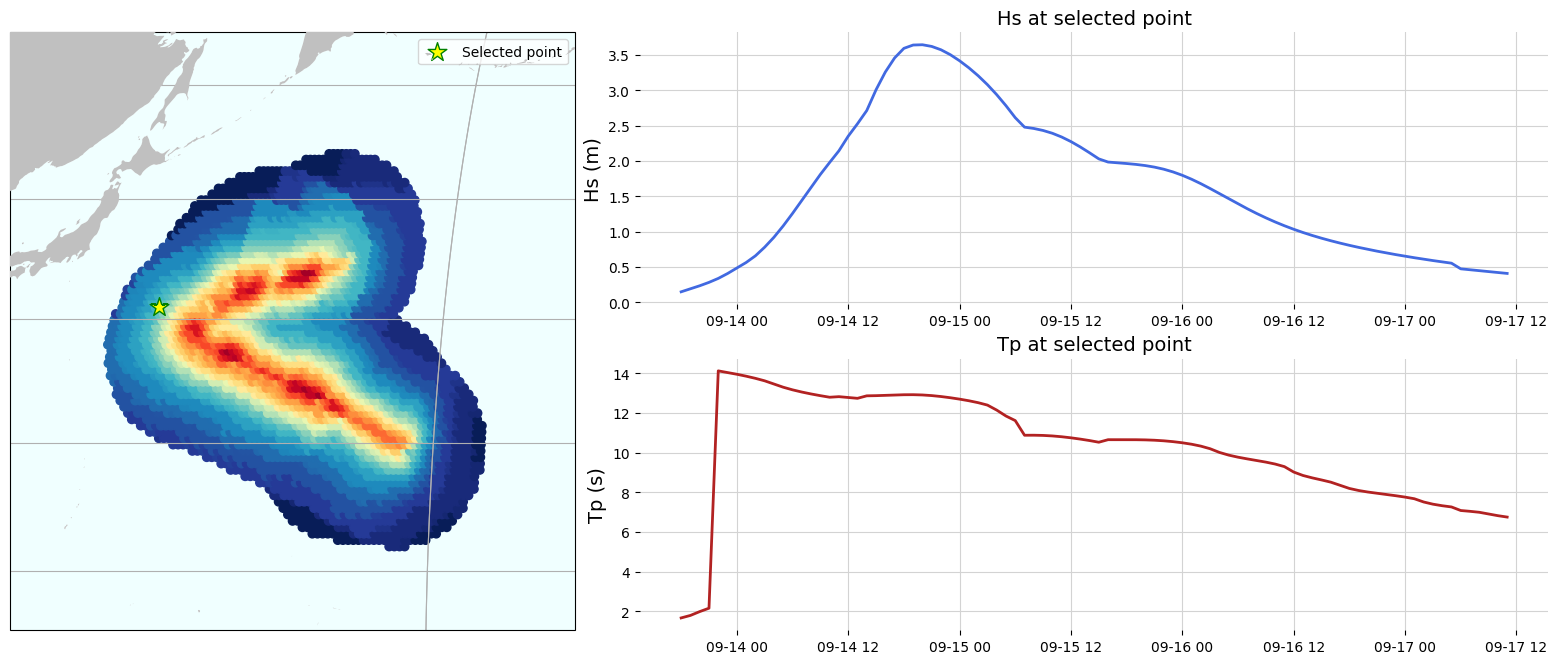

In [16]:
plot_hs_tp_point(xds_bulk, area, lon, lat)